In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/energy.zip

Archive:  /content/gdrive/MyDrive/energy.zip
  inflating: Tamil Nadu/34693_9.35_77.55_2003.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2009.csv  
  inflating: MP/44412_24.25_80.45_2012.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2000.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2013.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2010.csv  
  inflating: MP/44412_24.25_80.45_2001.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2014.csv  
  inflating: MP/44412_24.25_80.45_2014.csv  
  inflating: MP/44412_24.25_80.45_2005.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2007.csv  
  inflating: MP/44412_24.25_80.45_2007.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2004.csv  
  inflating: MP/44412_24.25_80.45_2010.csv  
  inflating: MP/44412_24.25_80.45_2009.csv  
  inflating: MP/44412_24.25_80.45_2004.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2006.csv  
  inflating: MP/44412_24.25_80.45_2000.csv  
  inflating: MP/44412_24.25_80.45_2003.csv  
  inflating: MP/44412_24.25_80.45_200

In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r'./Andhra Pradesh'
print(path)
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

./Andhra Pradesh


In [4]:
frame.head()

,Year,Month,Day,Hour,Minute,GHI
0,2006,1,1,0,0,0
1,2006,1,1,1,0,0
2,2006,1,1,2,0,0
3,2006,1,1,3,0,0
4,2006,1,1,4,0,0


In [5]:
frame.sort_values(by=['Year'])

,Year,Month,Day,Hour,Minute,GHI
131399,2000,12,31,23,0,0
125550,2000,5,2,6,0,49
125551,2000,5,2,7,0,263
125552,2000,5,2,8,0,509
125553,2000,5,2,9,0,719
...,...,...,...,...,...,...
64241,2014,5,2,17,0,154
64242,2014,5,2,18,0,1
64243,2014,5,2,19,0,0
64237,2014,5,2,13,0,936


In [6]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [7]:
import datetime as dt

df_all = frame[['Date','GHI']]
single = df_all['Date']

In [8]:
df_all.set_index('Date',inplace=True)

In [9]:
df_all = df_all.between_time('09:00','15:00')
df_all.sort_values(by=['Date'])

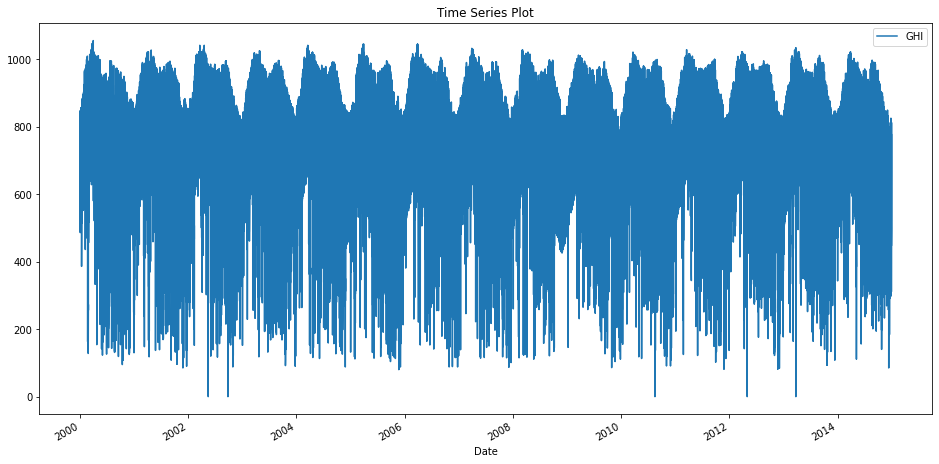

In [12]:
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [13]:
df_all.fillna(df_all.mean(),inplace=True)

In [14]:
y=df_all['GHI'].resample('1D').mean()

In [15]:
y.fillna(y.mean(),inplace=True)

In [27]:
import itertools
p =  q = range(0, 3)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [28]:
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm

modelparams = []

for param in pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=(0,0,0,0))  #Seasonal order=(0,0,0,0) means we are using ARIMA model
            except:
                continue
            results = mod.fit()
            modelparams.append([param,results.aic])

In [29]:
modelparams

[[(0, 0, 0), 87552.39860144524],
 [(0, 0, 1), 81329.23044735916],
 [(0, 0, 2), 77345.34150661828],
 [(0, 1, 0), 66978.52959711476],
 [(0, 1, 1), 66015.96519794076],
 [(0, 1, 2), 65681.73300252581],
 [(1, 0, 0), 66964.1559126381],
 [(1, 0, 1), 66029.10529314008],
 [(1, 0, 2), 65698.5285196779],
 [(1, 1, 0), 66420.63217604798],
 [(1, 1, 1), 65536.99877058632],
 [(1, 1, 2), 65527.23506636033],
 [(2, 0, 0), 66421.49508212463],
 [(2, 0, 1), 65554.394865151],
 [(2, 0, 2), 65544.68097376882],
 [(2, 1, 0), 66206.43306938605],
 [(2, 1, 1), 65526.979386590574],
 [(2, 1, 2), 65528.97843460147]]

In [21]:
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm

model= sm.tsa.statespace.SARIMAX(y,order=(2, 1, 1),seasonal_order=(0,0,0,0))
model_fit=model.fit()

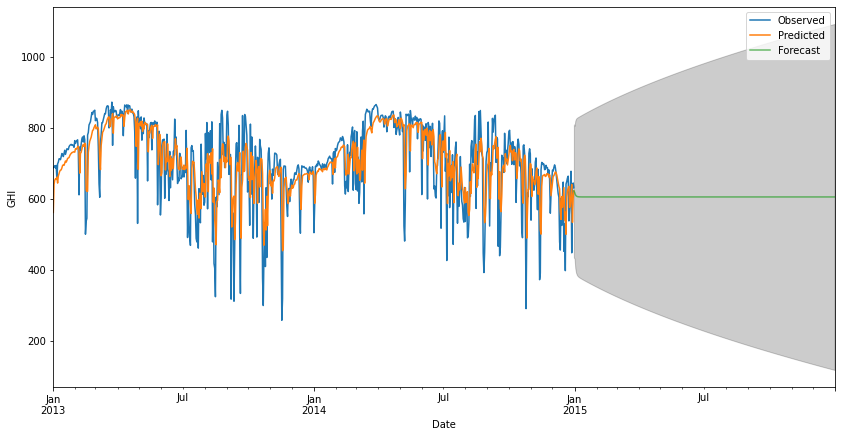

In [22]:
#Plot observed data
ax = y['2013':'2014'].plot(label='Observed')
pred = model_fit.predict(start=pd.to_datetime('2013-01-01'),end=pd.to_datetime('2014-12-31'), dynamic=False)
#Plot predicted data
pred.plot(ax=ax, label='Predicted', alpha=1, figsize=(14, 7))

forecast = model_fit.get_prediction(start=pd.to_datetime('2014-12-31'),end=pd.to_datetime('2015-12-31'), dynamic=False)
forecast_ci = forecast.conf_int()
forecast.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('GHI')
plt.legend()
plt.show()

In [23]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_forecasted = pred
y_truth = y['2013-01-01':'2014-12-31']

mean_absolute_percentage_error(y_truth,y_forecasted)

9.672370209476549